In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numba
from numba import types, typed

In [2]:
state = np.random.randint(0, 2, (10, 10))
state

array([[1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0, 1]], dtype=int32)

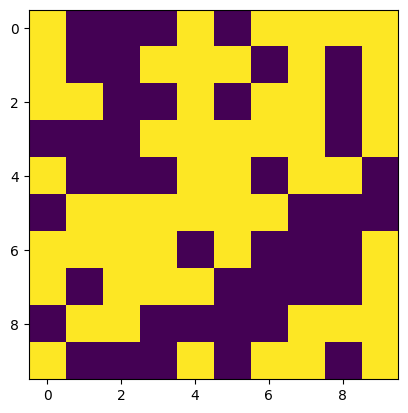

In [3]:
plt.imshow(state)

In [4]:
@numba.njit
def next_cell_state(state, i, j):
    height, width = state.shape

    count = -state[i, j]
    for di in range(-1, 2):
        for dj in range(-1, 2):
            count += state[(i + di) % height, (j + dj) % width]

    if state[i, j] == 0 and count == 3:
        return 1
    
    if state[i, j] == 1 and (count == 2 or count == 3):
        return 1

    return 0

In [10]:
#@numba.njit(numba.int64[:, :](numba.int64[:, :]))
#@numba.njit
@numba.njit(parallel=True)
def next_state(state):
    height, width = state.shape
    new_state = np.zeros_like(state)

    for i in numba.prange(height):
        for j in range(width):
            new_state[i, j] = next_cell_state(state, i, j)

    return new_state

In [6]:
@numba.njit
def calculate_steps(steps):
    initial_condition = np.random.randint(0, 2, (2000, 2000))
    history = [initial_condition]

    for _ in range(steps):
        new_state = next_state(history[-1])
        history.append(new_state)

    return history


In [12]:
states = calculate_steps(500)

In [8]:
# fig = plt.figure(figsize=(4, 4))

# img = plt.imshow(states[0])
# fig.subplots_adjust(0, 0, 1, 1)

# plt.close()

# def update(frame):
#     img.set_array(states[frame])
#     return img,

# anim = FuncAnimation(fig, update, frames=len(states), interval=200, blit=True)
# HTML(anim.to_jshtml())